# Introduction to neural network classification with tensorflow

In this notebook we're going to learn how to write neural networks for classification.

A classification is where you try to classify something as one thing or another.

A few type of class classification:
* Binary classification.
* Multiclass classification.
* Multilabel classification.

## Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [ ]:
# check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# check out the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand. Let's visualize it.

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X":X[:,0], "X1":X[:,1], "label":y})
circles

,X,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


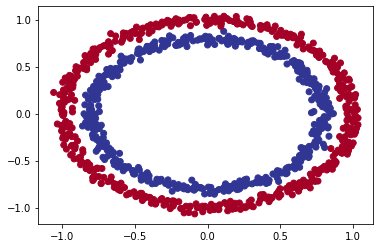

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

🛠Exercise: play around with [tensorflow playground](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjxxKHV54ryAhVLWysKHQzMDR4QFjAAegQIAxAD&url=https%3A%2F%2Fplayground.tensorflow.org%2F&usg=AOvVaw2vOMcWmUkU5HmbODfylijL)

## Input and output shapes 

In [ ]:
# check the input and output shapes of features and lables
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[0:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# View the first example of feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with Tensorflow are typically:

1. Create or import a model.
2. Compile the model.
3. Fit the model.
4. Evaluate the model.
5. Tweak.
6. Evaluate...

In [ ]:
import tensorflow as tf

In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(1000, 800, 200, 800, 200)

In [ ]:
# try a model 

tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 [==============================] - 1s 1ms/step - loss: 1.4444 - accuracy: 0.4925
Epoch 2/5
25/25 [==============================] - 0s 956us/step - loss: 0.7313 - accuracy: 0.5013
Epoch 3/5
25/25 [==============================] - 0s 1ms/step - loss: 0.7085 - accuracy: 0.5000
Epoch 4/5
25/25 [==============================] - 0s 996us/step - loss: 0.6998 - accuracy: 0.4963
Epoch 5/5
25/25 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4950


In [ ]:
 model_1.fit(X_train,y_train,epochs=200,verbose=False)
 model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4550


[0.6945397853851318, 0.45500001311302185]

Let's add more layers and train longer

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

# 3. Train the model
model_2.fit(X_train,y_train,epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4800


[0.6947243213653564, 0.47999998927116394]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model. - We might to add more layers or increase the number of hidden unnits within a layer.
2. Compile a model. - We might to choose a different optimization function such as Adam.
3. Fitting a model. - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Attempt 1
tf.random.set_seed(42)

# 1. Create a model
model_at_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile a model
model_at_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# 3. Fit the model
model_at_1.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_at_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5100


[0.7004726529121399, 0.5099999904632568]

In [ ]:
model_at_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model_at_1.predict(X_test) # all the predict just around 0.5

To visualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, feature (X) and label (y)
* Create a meshgrid of the different X values
* Make predictions accross the meshgrid
* Plot the predictions as well as a line between zones (Where each unique class fall)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to predictions on these):
  # ravel() is flatten an array
  # np.c_ is concat array along the second axis
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d array together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class:
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classificatioon")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classificatioon


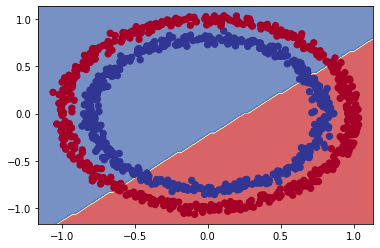

In [ ]:
# check out the prediction our model making
plot_decision_boundary(model_at_1,
                       X=X,
                       y=y)

In [ ]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
x_in = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
x_max - x_min

2.293214212456201

<function matplotlib.pyplot.show>

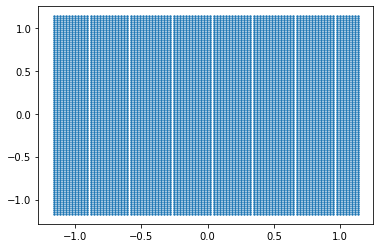

In [ ]:
plt.scatter(xx,yy,s=2)
plt.show

In [ ]:
xx.shape

(100, 100)

In [ ]:
x_in.shape

(10000, 2)

In [ ]:
y_pred = model_at_1.predict(x_in)
y_pred.shape
y_pred[0]

array([0.5062961], dtype=float32)

In [ ]:
np.round(y_pred).reshape(xx.shape)

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [ ]:
np.round(y_pred).reshape(xx.shape)[0]

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

It look like the contours shows that our model only learn the linear pattern.

## The missing pieces: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_linear = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])
# 2. Compile the model
model_linear.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
# 3. Fit the model
history = model_linear.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

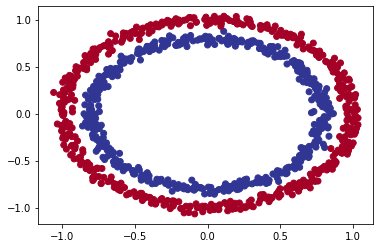

In [ ]:
# Check out our data
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

doing binary classificatioon


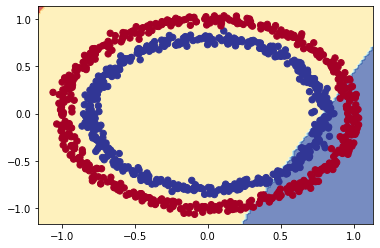

In [ ]:
 # check the decisision boundary
 plot_decision_boundary(model_linear, X, y)

Let's try build our first neural network with a non-linear activate function

In [ ]:
tf.random.set_seed(42)

# 1. Creata a model
model_nonlinear_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
# 2. Compile the model
model_nonlinear_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_nonlinear_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

doing binary classificatioon


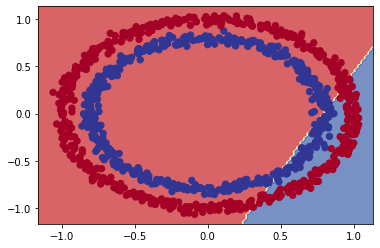

In [ ]:
plot_decision_boundary(model_nonlinear_1, X, y)

Let's try build a model based on [Tensorflow playground](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=4,1&seed=0.57311&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
#
tf.random.set_seed(42)

# 1. Create a model
model_nonlinear_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_nonlinear_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_nonlinear_2.fit(X, y, epochs=500)

Epoch 1/500
32/32 [==============================] - 0s 1ms/step - loss: 2.0341 - accuracy: 0.5000
Epoch 2/500
32/32 [==============================] - 0s 1ms/step - loss: 1.5550 - accuracy: 0.4900
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 1.1926 - accuracy: 0.4370
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.9385 - accuracy: 0.4140
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8999 - accuracy: 0.4100
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8866 - accuracy: 0.4260
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8764 - accuracy: 0.4360
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8679 - accuracy: 0.4490
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8601 - accuracy: 0.4490
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.8527 - accuracy: 0.4460
Epoch 11/

doing binary classificatioon


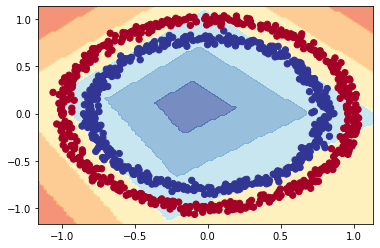

In [ ]:
plot_decision_boundary(model_nonlinear_2, X, y)

In [ ]:
def plot_training_process(history):
  plt.figure(figsize=(10,8))
  plt.plot(history.history["accuracy"])
  plt.plot(history.history["loss"])
  plt.ylim(0,1)
  plt.xlabel("# epochs")
  plt.ylabel("loss")
  plt.legend(["accuracy", "loss"], loc="upper right")
  plt.show()  

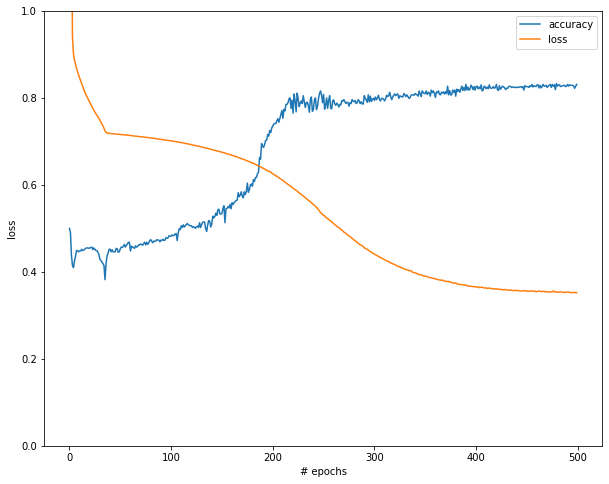

In [ ]:
plot_training_process(history)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_nonlinear_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_nonlinear_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_nonlinear_3.fit(X, y, epochs=400, verbose=0)

In [ ]:
model_nonlinear_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classificatioon


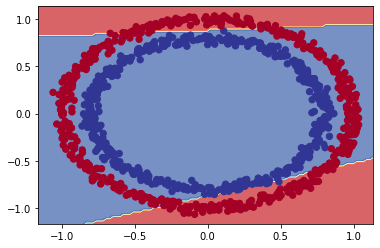

In [ ]:
plot_decision_boundary(model_nonlinear_3, X, y)

This time we add activate function for the output layer

why use sigmoid for binary classification output layer? [click here](https://youtu.be/WsFasV46KgQ)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_nonlinear_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_nonlinear_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_nonlinear_4.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_nonlinear_4.evaluate(X, y)

32/32 [==============================] - 0s 999us/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classificatioon


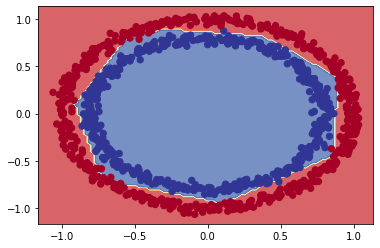

In [ ]:
plot_decision_boundary(model_nonlinear_4, X, y)

**Question**: what's wrong the predictions we've made? Are we really evaluating our model correctly?

What data did the model learn on and what data did we predict on

🔑**Note:** The combination of **linear and non-linear** is one of the key fundamentals of neural networks.

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

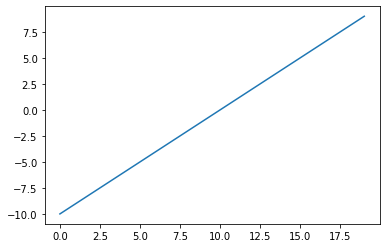

In [ ]:
# Visualize our data
plt.plot(A)

In [ ]:
def sigmoid_act(x): # sigmoid = 1/ 1+e^-x
  # return [float(1/(1+tf.exp(-x))) for x in A]
  return 1/(1+tf.exp(-x))

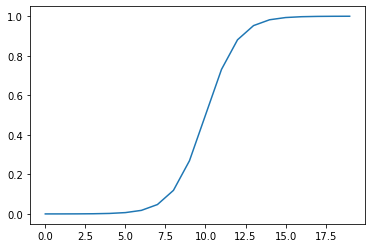

In [ ]:
plt.plot(sigmoid_act(A))

In [ ]:
def relu_act(x):
  # return [max(0, x) for x in A]
  return tf.maximum(0, x)

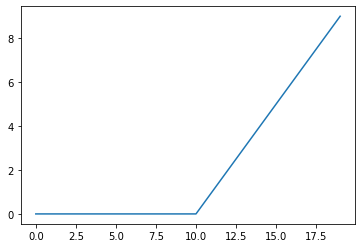

In [ ]:
plt.plot(relu_act(A))

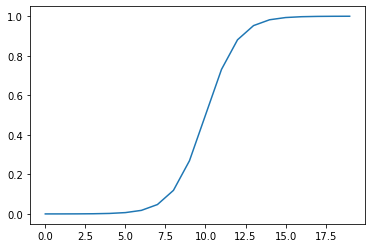

In [ ]:
# or try build-in function
plt.plot(tf.keras.activations.sigmoid(A))

## Evaluating and improving our model

Use the same dataset for training and evaluating is a sin


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# len(X_train), len(X_test), len(y_train), len(y_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a training model
tf.random.set_seed(42)

# 1. Create a model
model_nonlinear = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                       
])
# 2. Compile the model
model_nonlinear.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_nonlinear.fit(X_train, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5113
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5238
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5238
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5337
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5387
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5450
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5450
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5512
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.5462
Epoch 11/

In [ ]:
model_nonlinear.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7600


[0.5186209678649902, 0.7599999904632568]

In [ ]:
model_nonlinear_4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's change the learning rate
tf.random.set_seed(42)

# 1. Create a model
model_nonlinear = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                       
])
# 2. Compile the model
model_nonlinear.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)
# 3. Train the model
history = model_nonlinear.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7675
Epoch 11/25
25/25 [===========

In [ ]:
model_nonlinear.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863724172115326, 0.9449999928474426]

doing binary classificatioon
doing binary classificatioon


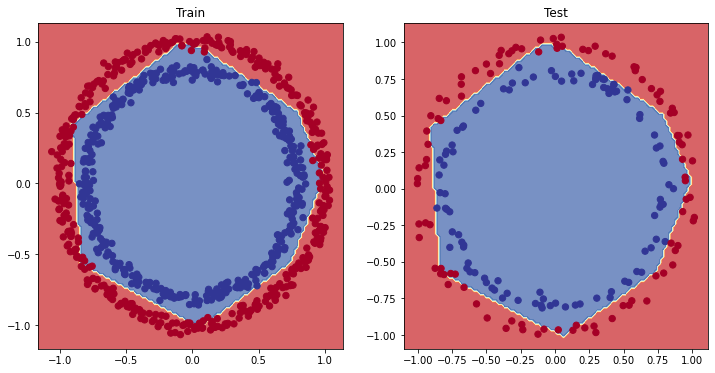

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_nonlinear, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_nonlinear, X_test, y_test)
plt.show()

## Plot the loss (training) curves

In [ ]:
# history.history

In [ ]:
# Convert the history object into Dataframe

data = pd.DataFrame(history.history)

In [ ]:
data.head()

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125


Text(0.5, 1.0, 'Model loss curves')

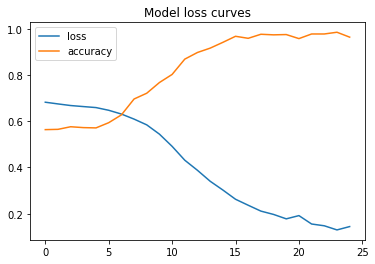

In [ ]:
# plot the history
pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training). We're going to use the following steps:
* A learning rate **callback** - you can think callback as extra piece of functionality, you can add to your *while* it training.
* Another model (We could use the same model as above, but we're praticing building models here)
* A modified loss curves plot.   

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_9.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)
# 3. Create a training rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# 4. Traing the model
model_9_history = model_9.fit(
    X_train,
    y_train, 
    epochs=100,
    callbacks=[lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5100
Epoch 11/

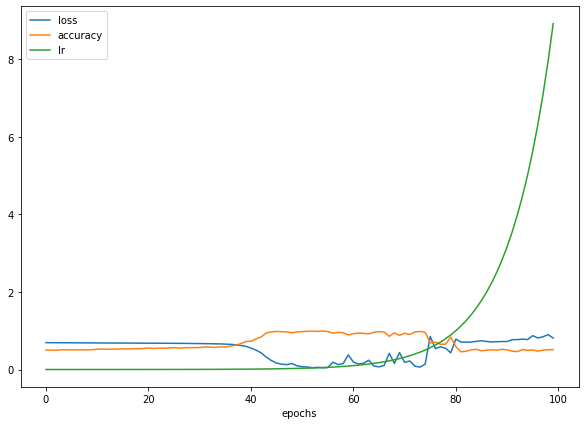

In [ ]:
# checkout the history
pd.DataFrame(model_9_history.history).plot(figsize=(10, 7), xlabel="epochs")
plt.show()

In [ ]:
# plot the learning rate vs the loss
lrs = 1e-4 * (10 **(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
 len(lrs)

100

Text(0.5, 1.0, 'Leanring rate vs loss')

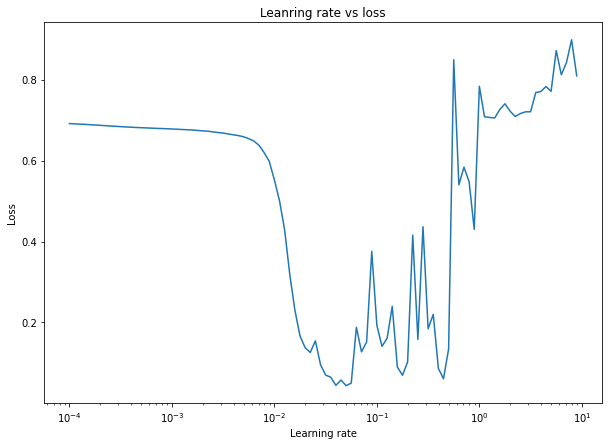

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, model_9_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Leanring rate vs loss")

In [ ]:
# Let's try using a higher *ideal* lr with the same model
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_10.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)
# 3. Train the model -> this time we only train for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5863
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5888
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6075
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6475
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7200
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5361 - accuracy: 0.7500
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8662
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.9137
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9350
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9538
Epoch 11/25
25/25 [

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9750


[0.1071704849600792, 0.9750000238418579]

doing binary classificatioon
doing binary classificatioon


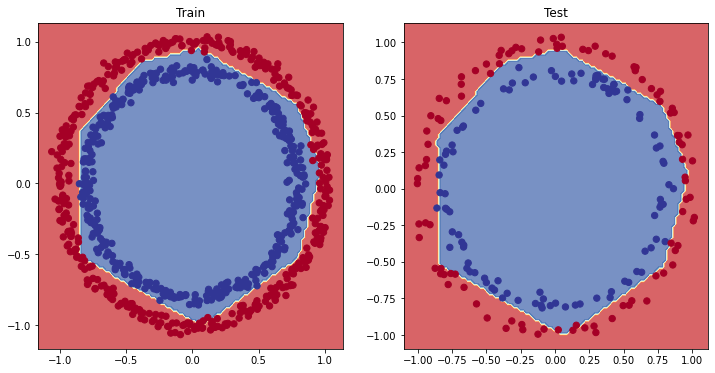

In [ ]:
# plot the training and testing
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_10, X_train, y_train)
plt.title("Train")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_10, X_test, y_test)
plt.title("Test")
plt.show()

## More classification evaluation metrics

Alongside visualizing our models results as much as possible, there are handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report from scikit-learn [link text](https://https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss:.2f}")
print(f"Model acc on the test set: {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9750
Model loss on the test set:0.11
Model acc on the test set: 97.50%


How about confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)
# Make confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[96,  4],
       [ 1, 99]])

How about we prettify our confusion matrix

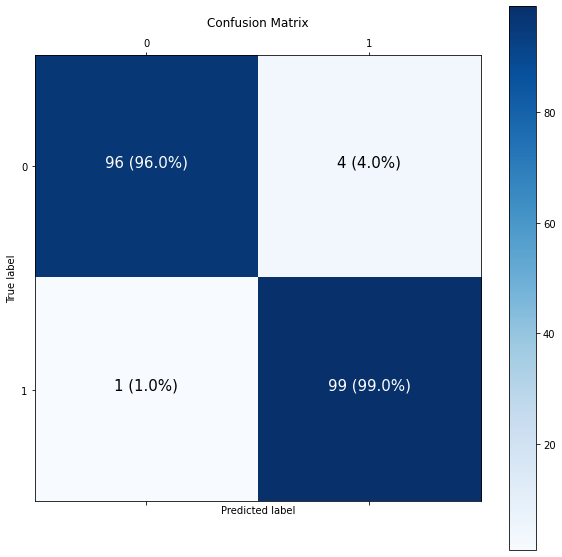

In [ ]:
# using scikit-learn confusion matrix plot function
from sklearn.metrics import plot_confusion_matrix
import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our cm
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else: 
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

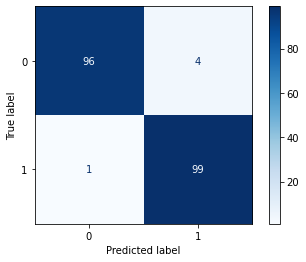

In [ ]:
# or using Confusion matrix display
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tf.round(y_preds))
cmd = ConfusionMatrixDisplay(cm, ["0", "1"])
cmd.plot(cmap=plt.cm.Blues)

# Working with larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multiclass classification.

To practise multi-class classification, we're going to build a neural network to class image of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data already been sorted into train and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

train label: 9


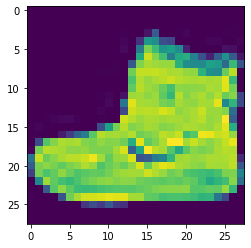

In [ ]:
plt.imshow(train_data[0])
print(f"train label: {train_labels[0]}")

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train label: T-shirt/top


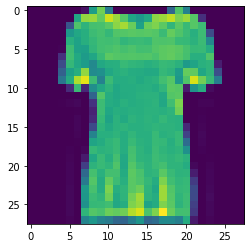

In [ ]:
plt.imshow(train_data[10])
print(f"train label: {class_names[train_labels[10]]}")

In [ ]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Text(0.5, 1.0, 'Coat')

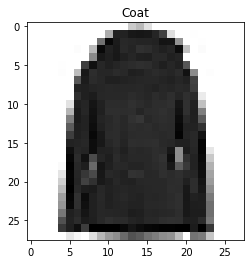

In [ ]:
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

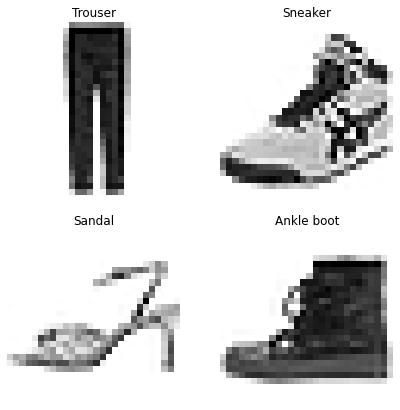

In [ ]:
# Plot multiple random images of fashion mnist
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multiclass classification model

FOr our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're goint to tweak a few things.
* Input shape = 28 x 28 shape of 1 image.
* Output layer shape = 10 (one per class of clothing).
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax 

In [ ]:
# our data needs to be flatten (from 28 x 28 to 748)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_multiclass_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
model_multiclass_1.compile(
    # loss=tf.keras.losses.CategoricalCrossentropy(), # this required the label must be in one-hot
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
multiclass_1_history = model_multiclass_1.fit(
                        train_data, 
                        train_labels, 
                        epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_multiclass_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
# Compile the model
model_multiclass_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), # this required the label must be in one-hot
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
nonnorm_history = model_multiclass_1.fit(
                        train_data, 
                        tf.one_hot(train_labels, depth=10), 
                        epochs=10,
                        validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
model_multiclass_1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_59 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max value of our data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the number in the tensor they try to find patterns between 0 & 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and the max value of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our the data has been normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model 
model_multiclass_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
model_multiclass_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Train the model
norm_history = model_multiclass_2.fit(
                          train_data_norm,
                          tf.one_hot(train_labels, depth=10),
                          epochs=10,
                          validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> 🔑**Note:** Neural network tends to refer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

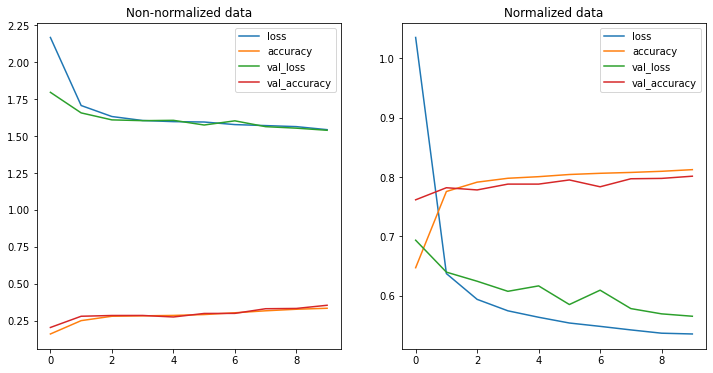

In [ ]:
import pandas as pd

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
pd.DataFrame(nonnorm_history.history).plot(title="Non-normalized data", ax=plt.gca())
plt.subplot(1, 2, 2)
pd.DataFrame(norm_history.history).plot(title="Normalized data", ax=plt.gca())
plt.show()

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_multiclass_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
# compile the model
model_multiclass_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Creat a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 **(epochs/20))
# Fit the model
find_lr_history = model_multiclass_3.fit(
                    train_data_norm,
                    train_labels,
                    epochs=40,
                    validation_data=(test_data_norm, test_labels),
                    callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

In [ ]:
lr = 1e-3 * 10 **(tf.range(40)/20)
lr

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

Text(0.5, 1.0, 'Learning rate vs Loss')

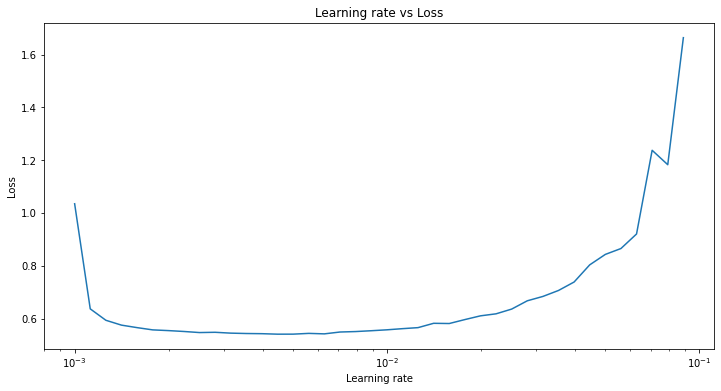

In [ ]:
plt.figure(figsize=(12,6))
plt.semilogx(lr, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# looks like the default lr=0.001 is an ideal learning rate :v

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_multiclass_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
model_multiclass_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# Train the model
multiclass_history_4 = model_multiclass_4.fit(
                          train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by train it for longer or improving architecture)
* Save and export it for use in an application

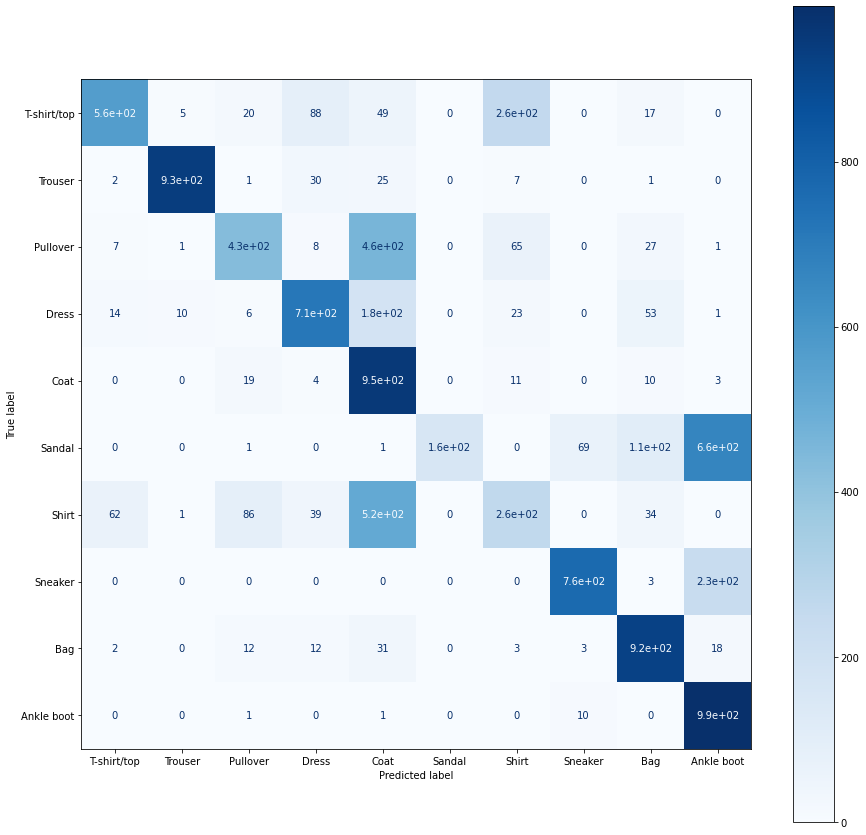

In [ ]:
# Create confusion matrix
y_preds = model_multiclass_4.predict(test_data)
y_preds = np.argmax(y_preds, axis=1)

cm = confusion_matrix(test_labels, y_preds)
fig,ax = plt.subplots(figsize=(15,15))
cmd = ConfusionMatrixDisplay(cm, [*class_names])
cmd.plot(cmap=plt.cm.Blues, ax=ax)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model 
model_multiclass_5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
model_multiclass_5.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
# Train the model
multiclass_history_5 = model_multiclass_5.fit(
                          train_data_norm,
                          train_labels,
                          epochs=10,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4911 - accuracy: 0.8251 - val_loss: 0.4167 - val_accuracy: 0.8487
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3665 - accuracy: 0.8662 - val_loss: 0.4453 - val_accuracy: 0.8440
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3339 - accuracy: 0.8769 - val_loss: 0.3869 - val_accuracy: 0.8565
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3087 - accuracy: 0.8861 - val_loss: 0.3717 - val_accuracy: 0.8656
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2921 - accuracy: 0.8902 - val_loss: 0.3601 - val_accuracy: 0.8680
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.8948 - val_loss: 0.3872 - val_accuracy: 0.8557
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2684 - accuracy: 0.8992 - val_loss: 0.3533 - val_accuracy:

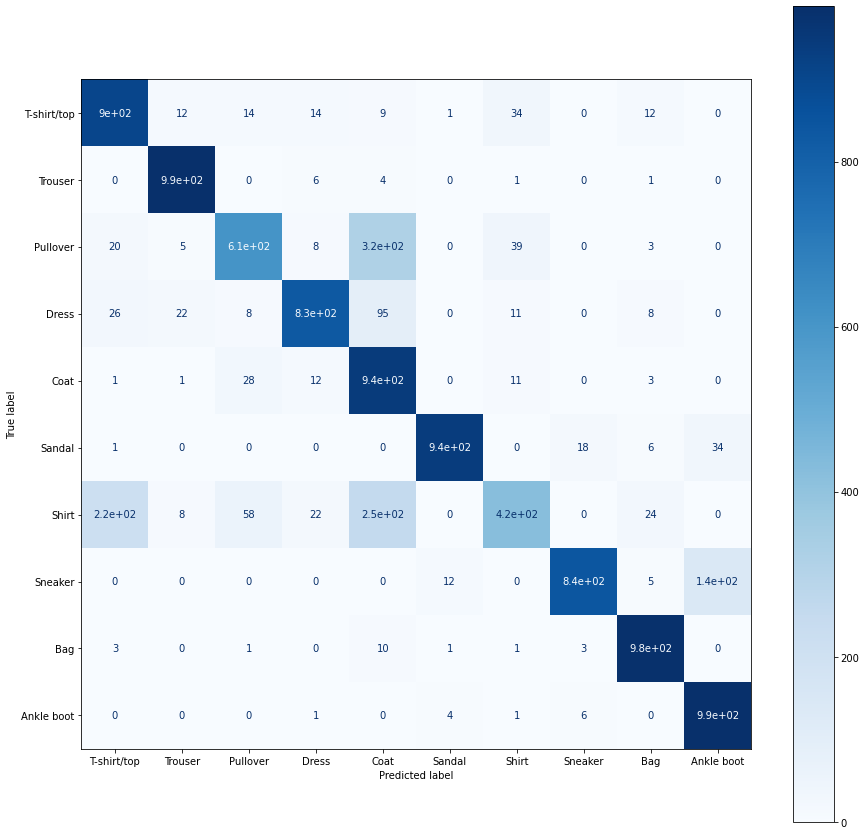

In [ ]:
y_preds = model_multiclass_5.predict(test_data)
y_preds = np.argmax(y_preds, axis=1)

cm = confusion_matrix(test_labels, y_preds)
fig,ax = plt.subplots(figsize=(15,15))
cmd = ConfusionMatrixDisplay(cm, [*class_names])
cmd.plot(cmap=plt.cm.Blues, ax=ax)

> 🔑**Note:** Often when working with images and other form of visual data, it's a good idea to visualize as much as possible to develope a further undestanding of the data and the input and the output of your models.

Create a function:
* Plot a random image.
* Make prediction on the image.
* Label the plot with the truth table & predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Pick a random image, plots it and labels it with a predicted & truth label
  """
  # Set up random integer
  rand_index = random.randint(0, len(images))

  # Create a predictions and target
  target_image = images[rand_index]
  pred_props = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_props.argmax()]
  true_label = classes[true_labels[rand_index]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Char color of the title depending if prediction is right or wrongs
  if pred_label == true_label:
    color="green"
  else:
    color="red"
  
  # Add x label information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_props), true_label), color=color)

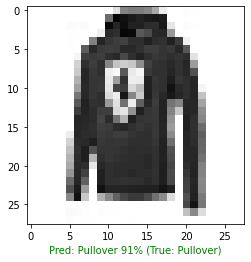

In [ ]:
plot_random_image(model_multiclass_5, test_data_norm, test_labels, class_names)

## What pattern is our model learning?

In [ ]:
# Find the layers of our most recent model
model_multiclass_5.layers

In [ ]:
model_multiclass_4.layers

In [ ]:
# Get the patterns of particular layer
weights, biases = model_multiclass_4.layers[1].get_weights()

# Shape
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
model_multiclass_4.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_27 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_109 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_110 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now checkout the bias vector

In [ ]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix. 

The bias vector get initialized as zeros (at least in the case of tensorflow dense layer).

The bias vector indicate how much the patterns within the corresponding weights matrix should influence the next layers.

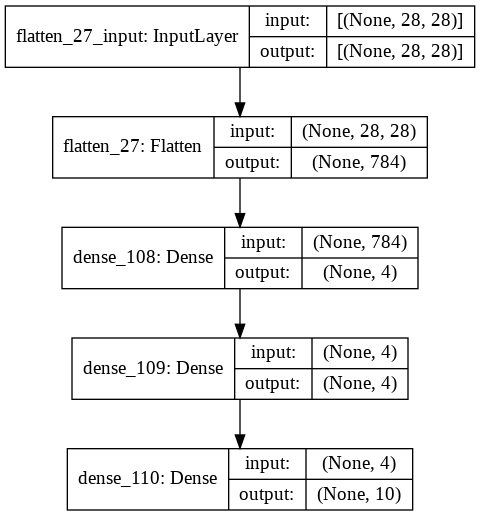

In [ ]:
# Let's check another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See input and output of each layer
plot_model(model_multiclass_4, show_shapes=True)

# Extra Exercise

## 1. Replicate the model in Tensorflow playground
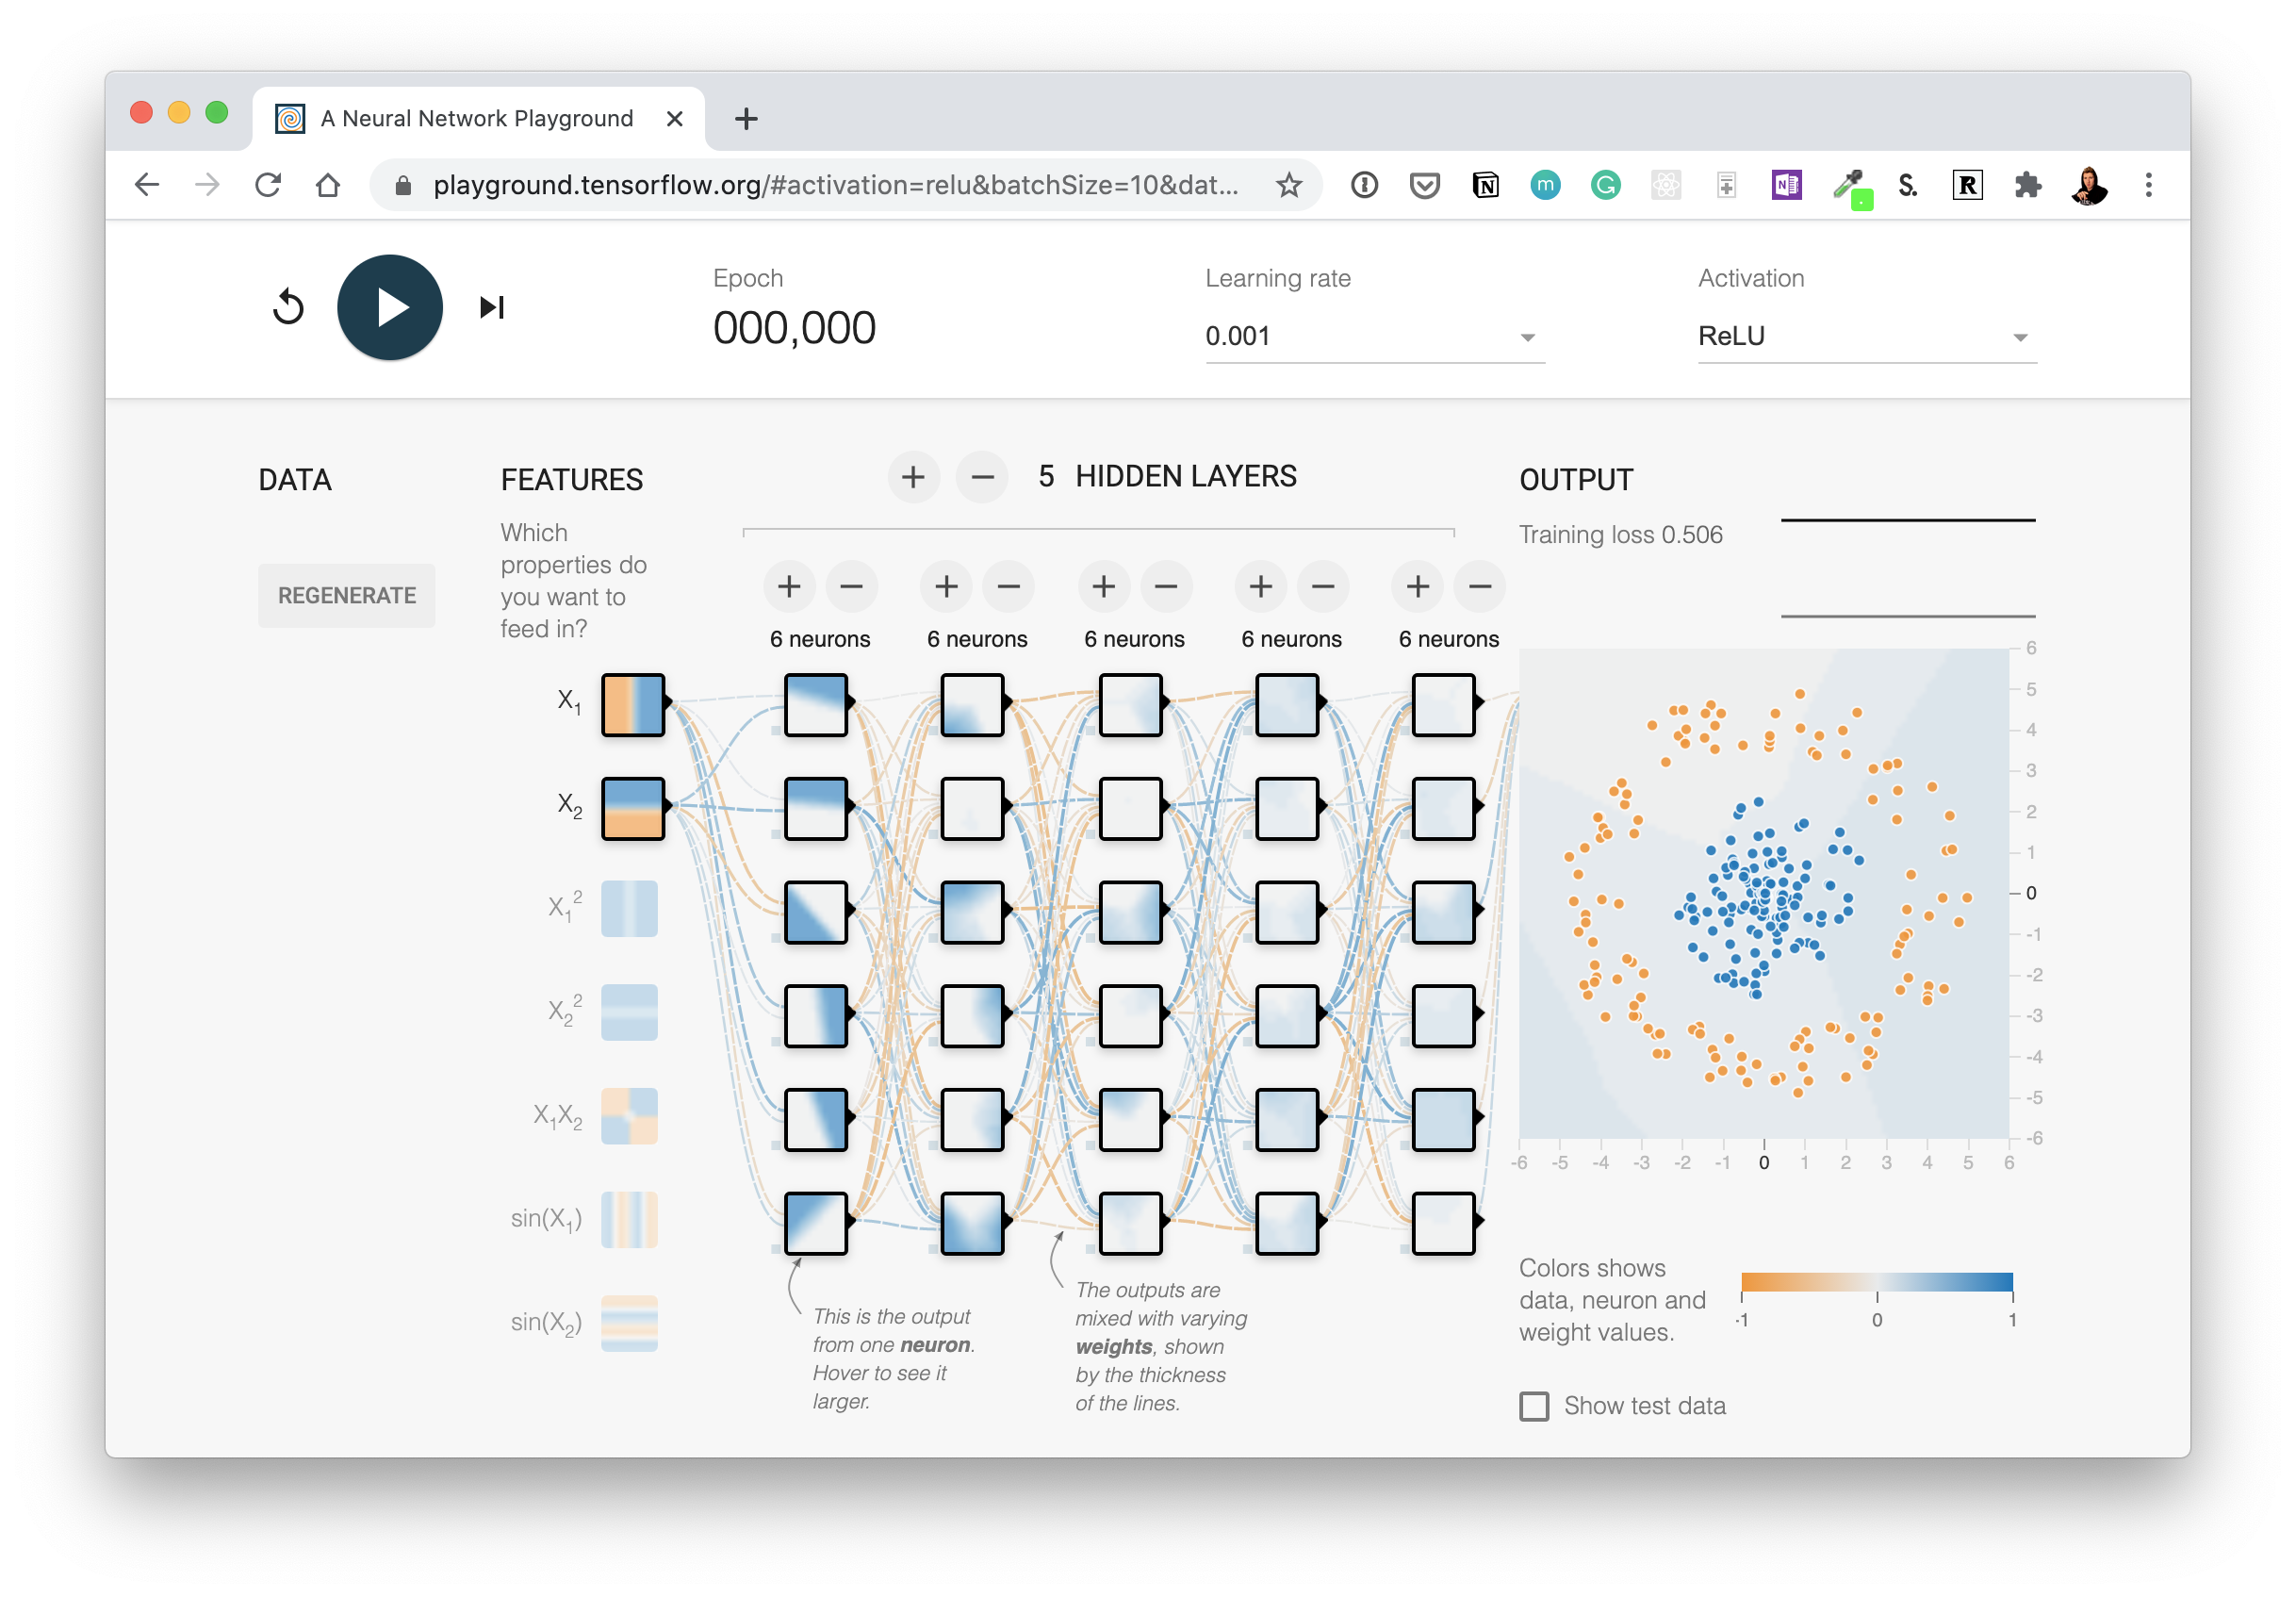



In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

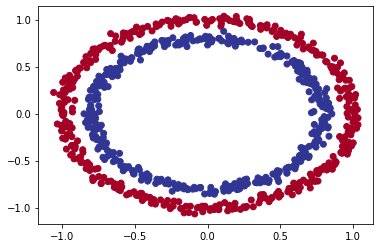

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=plt.cm.RdYlBu)

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value (we're going to predictions on these):
  # ravel() is flatten an array
  # np.c_ is concat array along the second axis
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d array together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class:
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classificatioon")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
tf.random.set_seed(42)

# Create the model
ex_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
ex_model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
ex_model_1_history = ex_model_1.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
ex_model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 3.1563e-04 - accuracy: 1.0000


[0.0003156289749313146, 1.0]

doing binary classificatioon


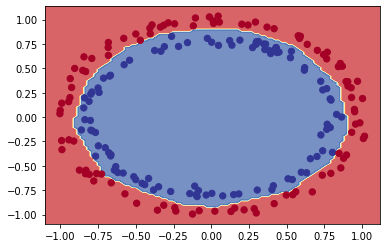

In [ ]:
plot_decision_boundary(ex_model_1, X_test, y_test)

## 2. Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [11]:
from sklearn.datasets import make_moons

In [12]:
n_samples = 1000

X, y = make_moons(
    n_samples=n_samples, 
    random_state=42)

In [15]:
df = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "Y": y})
df.head()

,X0,X1,Y
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


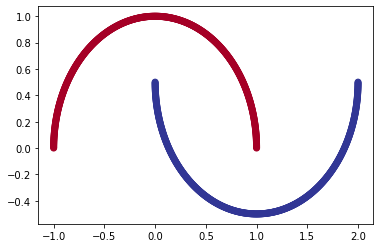

In [17]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [20]:
# Let's try make a model
tf.random.set_seed(42)

# Make a model
ex_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
ex_model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# Fit the model
ex_model_2_history = ex_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5038
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6388 - accuracy: 0.5125
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.5350
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.8475
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.8775
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8800
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4690 - accuracy: 0.8788
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8775
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8788
Epoch 11/

In [21]:
ex_model_2.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9250


[0.1650254875421524, 0.925000011920929]

doing binary classificatioon


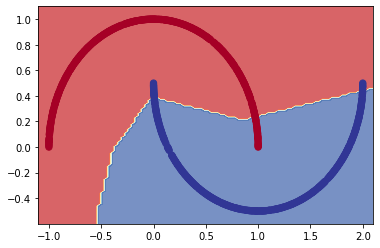

In [23]:
plot_decision_boundary(ex_model_2, X_train, y_train)

## 3. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [36]:
from tensorflow.keras.datasets import fashion_mnist

# The data already been sorted into train and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [25]:
class_names = class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
# Data preprocessing
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [38]:
# One-hot labels
y_train_one_hot = tf.one_hot(train_labels, depth=len(class_names))  # = 10)
y_test_one_hot = tf.one_hot(test_labels, depth=10)
y_train_one_hot[0], y_train_one_hot.shape

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>,
 TensorShape([60000, 10]))

In [41]:
# set random seed
tf.random.set_seed(42)

# Create a model
ex_model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
ex_model_3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
# train the model
ex_model_3_history = ex_model_3.fit(train_data_norm, y_train_one_hot, 
                                    validation_data=(test_data_norm, y_test_one_hot),
                                    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4952 - accuracy: 0.8260 - val_loss: 0.4183 - val_accuracy: 0.8487
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3740 - accuracy: 0.8651 - val_loss: 0.4622 - val_accuracy: 0.8434
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8770 - val_loss: 0.3823 - val_accuracy: 0.8589
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8872 - val_loss: 0.3698 - val_accuracy: 0.8649
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8913 - val_loss: 0.3627 - val_accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8965 - val_loss: 0.3718 - val_accuracy: 0.8606
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9004 - val_loss: 0.3504 - val_accuracy:

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

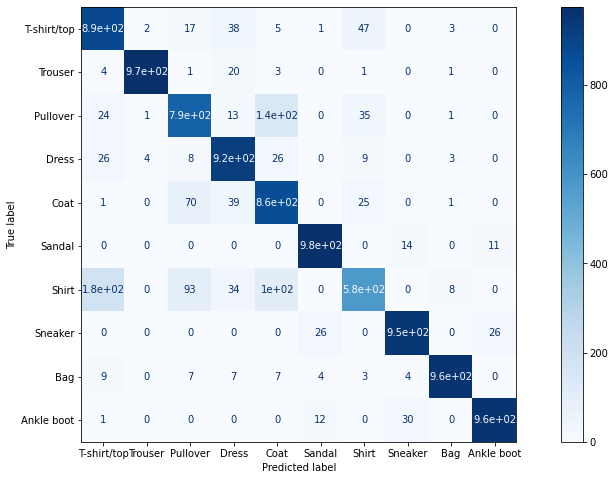

In [52]:
y_preds = ex_model_3.predict(test_data_norm)
y_preds = tf.argmax(y_preds, axis=1)

cm = confusion_matrix(test_labels, y_preds)
fig, ax = plt.subplots(figsize=(16,8))

cmd = ConfusionMatrixDisplay(cm, [*class_names])

cmd.plot(cmap=plt.cm.Blues, ax=ax)

## 4. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [85]:
demo_tensor = tf.cast(tf.range(-10, 10), tf.float32)
demo_tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [86]:
tf.nn.softmax(demo_tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([3.5416432e-09, 9.6271844e-09, 2.6169401e-08, 7.1135801e-08,
       1.9336716e-07, 5.2562643e-07, 1.4288008e-06, 3.8838834e-06,
       1.0557489e-05, 2.8698232e-05, 7.8009878e-05, 2.1205284e-04,
       5.7641941e-04, 1.5668704e-03, 4.2591952e-03, 1.1577693e-02,
       3.1471431e-02, 8.5548222e-02, 2.3254418e-01, 6.3212061e-01],
      dtype=float32)>

In [87]:
def softmax_act(X):
  aX = np.exp(X)
  A = aX / np.sum(aX)
  return A

In [88]:
softmax_act(demo_tensor)

array([3.5416421e-09, 9.6271826e-09, 2.6169396e-08, 7.1135787e-08,
       1.9336713e-07, 5.2562632e-07, 1.4288006e-06, 3.8838825e-06,
       1.0557488e-05, 2.8698227e-05, 7.8009871e-05, 2.1205282e-04,
       5.7641929e-04, 1.5668701e-03, 4.2591947e-03, 1.1577692e-02,
       3.1471428e-02, 8.5548215e-02, 2.3254415e-01, 6.3212055e-01],
      dtype=float32)

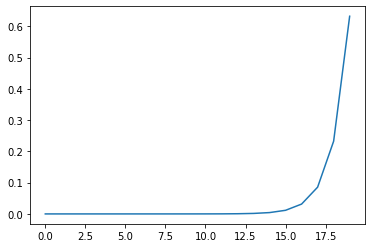

In [89]:
plt.plot(softmax_act(demo_tensor))

## 5. Plot 3 random image and predict it

In [132]:
import random

def plot_n_random_image(model, images, true_labels, classes, n):
  """
  Pick n random image, plots it and labels it with a predicted & truth label
  """
  # Set up random integer
  rand_index = random.sample(range(0, len(images)), n)

  # Set figure
  plt.figure(figsize=(10,10))

  for i in range(len(rand_index)):
     # Create a predictions and target
    target_image = images[rand_index[i]]
    pred_props = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_props.argmax()]
    true_label = classes[true_labels[rand_index[i]]]

    # Plot the image
    plt.subplot(2,2,i+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Char color of the title depending if prediction is right or wrongs
    if pred_label == true_label:
      color="green"
    else:
      color="red"
    
    # Add x label information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_props), true_label), color=color)

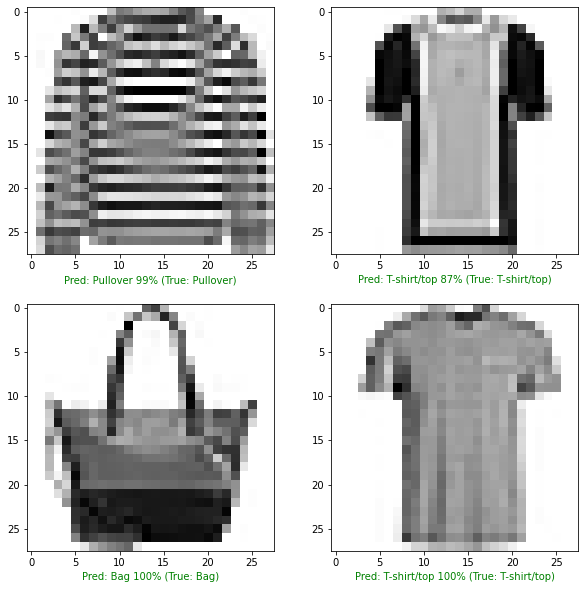

In [133]:
plot_n_random_image(ex_model_3, test_data_norm, test_labels, class_names, 4)

In [129]:
rand_index = random.sample(range(0, len(test_data)), 3)
rand_index, len(test_data)

([2110, 2732, 659], 10000)

## 6. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [198]:
def find_index_classes(true_labels, class_choice):
  # return [i for i in range(len(true_labels)) if true_labels[i] == class_choice]
  return np.where(true_labels == class_choice)[0]

In [136]:
# find_index_classes(test_labels, 0)

In [223]:
def plot_by_class_image(model, images, true_labels, classes, class_choice):
  """
  Pick 3 random image by percific class, plots it and labels it with a predicted & truth label
  """
  # Set up random integer
  rand_index = random.sample(class_choice, 3)
  print(rand_index)
  # Set figure
  plt.figure(figsize=(12,12))

  for i in range(len(rand_index)):
     # Create a predictions and target
    target_image = images[rand_index[i]]
    pred_props = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_props.argmax()]
    true_label = classes[true_labels[rand_index[i]]]

    # Plot the image
    plt.subplot(1,3,i+1)
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Char color of the title depending if prediction is right or wrongs
    if pred_label == true_label:
      color="green"
    else:
      color="red"
    
    # Add x label information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_props), true_label), color=color)

[867, 7156, 2612]


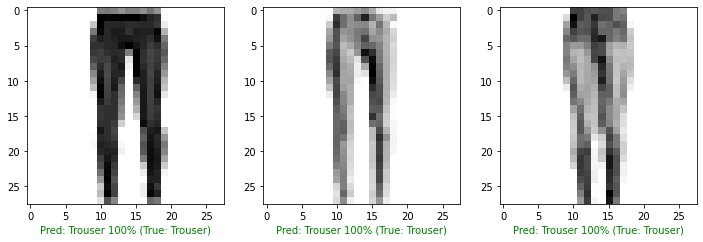

In [221]:
class_choice = find_index_classes(test_labels, 1)
# class_choice
plot_by_class_image(ex_model_3, test_data, test_labels, class_names, class_choice)